<a href="https://colab.research.google.com/github/fyebes/MACHIN_LEARNING/blob/main/PEC2_FelipeYebes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PEC 2 Felipe Yebes_ML

In [67]:
import numpy as np
import cv2
import pandas as pd
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import io
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import TensorBoard,History
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

1. Importar archivos csv
    Se monta una espacio Drive para darle más agilidad a la lectrua de los archivos csv.

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Leyendo el archivo csv y pasándolo a un dataframe con pandas.

In [69]:
expresion= pd.read_csv('/content/drive/MyDrive/MACHINGLEARNING/PEC2/expression.csv',index_col='X')
labels=pd.read_csv('/content/drive/MyDrive/MACHINGLEARNING/PEC2/labels.csv',index_col='X')

Comprobar los dataframe

In [70]:
expresion.head(5)

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
X,,,,,,,,,,,,,,,,,,,,,
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [71]:
labels.head(5)

,Class
X,
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA


Codificar el dataframe de salida como one-hot

In [72]:
labels=labels.astype('category')
encoder = OneHotEncoder(sparse=False)
encoder_labels = encoder.fit_transform(labels)
labels=pd.DataFrame(encoder_labels,columns=encoder.categories_)
labels.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,BRCA,COAD,KIRC,LUAD,PRAD
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0


Parámetros estadísticos básicos de expression.

In [73]:
expresion.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


2. Seleccionamos las columnas cuyo percentil de varianza es mayor que 0.8

In [74]:
expresion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, sample_0 to sample_800
Columns: 20531 entries, gene_0 to gene_20530
dtypes: float64(20264), int64(267)
memory usage: 125.5+ MB


In [75]:
extension2=expresion.loc[:,(expresion.var()>expresion.var().quantile(0.8))]
extension2

,gene_18,gene_21,gene_26,gene_28,gene_30,gene_31,gene_33,gene_39,gene_44,gene_45,...,gene_20445,gene_20466,gene_20472,gene_20476,gene_20484,gene_20490,gene_20500,gene_20504,gene_20524,gene_20529
X,,,,,,,,,,,,,,,,,,,,,
sample_0,0.591871,0.000000,7.215116,6.620204,0.000000,4.063658,4.747656,0.000000,1.010279,6.962850,...,2.015391,4.377061,1.010279,9.175285,2.717803,0.000000,5.902800,2.602077,7.220030,5.286759
sample_1,0.000000,0.000000,9.949812,1.174790,0.000000,0.000000,1.327170,0.811142,2.651224,6.698691,...,6.266046,2.530820,0.587845,0.000000,4.516185,4.008227,1.004394,0.811142,6.256586,2.094168
sample_2,1.683023,3.660427,6.096650,7.680507,0.000000,0.452595,0.000000,0.452595,0.000000,7.592345,...,3.677147,6.172313,0.000000,8.834108,6.535353,2.337254,0.000000,5.014445,5.401607,1.683023
sample_3,1.267356,0.000000,3.913761,6.469165,0.000000,1.267356,7.742714,0.434882,1.931418,8.890292,...,1.637239,6.318335,0.000000,7.529188,4.466457,0.434882,5.075383,6.233192,8.942805,3.292001
sample_4,0.889707,0.000000,1.942120,5.861429,0.000000,0.649386,2.612801,0.649386,0.000000,4.443070,...,0.649386,6.775999,5.370398,7.647883,0.889707,2.045093,3.954001,4.586531,7.181162,5.110372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,0.496922,1.955573,0.000000,6.139531,0.000000,0.000000,0.865919,0.000000,1.159435,4.611202,...,3.495810,7.520336,4.536476,8.486940,0.496922,3.070784,3.823709,1.611739,4.484415,8.819269
sample_797,0.000000,0.000000,9.169589,3.480317,0.000000,3.844888,2.245891,0.000000,0.000000,7.580251,...,3.547845,6.547101,0.618051,8.207756,0.618051,0.000000,0.000000,3.173351,6.555327,9.659081
sample_798,1.002595,5.179822,1.325099,4.362533,6.831738,7.452291,5.574986,6.299794,1.002595,6.941834,...,8.599548,6.825366,4.705480,8.089895,1.588469,2.326135,0.000000,4.092394,3.589763,4.677458


Dan 4106 genes que cumplen la condición de filtrado.

3. Normalizar las expresiones con la transformación minmax.


In [76]:
scaler = MinMaxScaler()
nombre_columnas=list(extension2.columns.values)
nombre_filas=list(extension2.index.values)
scaled_extension2 = pd.DataFrame(scaler.fit_transform(extension2), index= nombre_filas , columns=nombre_columnas)
scaled_extension2

,gene_18,gene_21,gene_26,gene_28,gene_30,gene_31,gene_33,gene_39,gene_44,gene_45,...,gene_20445,gene_20466,gene_20472,gene_20476,gene_20484,gene_20490,gene_20500,gene_20504,gene_20524,gene_20529
sample_0,0.054492,0.000000,0.543929,0.645785,0.000000,0.426832,0.356653,0.000000,0.086837,0.553104,...,0.215858,0.463935,0.133042,0.847687,0.306397,0.000000,0.653184,0.326209,0.784147,0.442221
sample_1,0.000000,0.000000,0.750091,0.114598,0.000000,0.000000,0.099700,0.095402,0.227883,0.525729,...,0.671123,0.268247,0.077412,0.000000,0.509141,0.357826,0.111143,0.101689,0.679510,0.141369
sample_2,0.154951,0.470410,0.459611,0.749215,0.000000,0.047539,0.000000,0.053232,0.000000,0.618338,...,0.393840,0.654217,0.000000,0.816167,0.736776,0.208654,0.000000,0.628635,0.586653,0.102625
sample_3,0.116682,0.000000,0.295048,0.631051,0.000000,0.133119,0.581648,0.051148,0.166013,0.752842,...,0.175356,0.669695,0.000000,0.695608,0.503535,0.038823,0.561625,0.781424,0.971253,0.254246
sample_4,0.081913,0.000000,0.146411,0.571768,0.000000,0.068209,0.196279,0.076377,0.000000,0.291981,...,0.069552,0.718203,0.707219,0.706574,0.100303,0.182571,0.437536,0.574990,0.779926,0.425599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_796,0.045750,0.251316,0.000000,0.598896,0.000000,0.000000,0.065050,0.000000,0.099658,0.309405,...,0.374418,0.797097,0.597401,0.784093,0.056022,0.274138,0.423119,0.202056,0.487040,0.775104
sample_797,0.000000,0.000000,0.691272,0.339496,0.000000,0.403853,0.168716,0.000000,0.000000,0.617084,...,0.379991,0.693942,0.081390,0.758299,0.069677,0.000000,0.000000,0.397827,0.711956,0.854243
sample_798,0.092306,0.665672,0.099896,0.425554,0.685723,0.782762,0.418804,0.740948,0.086177,0.550926,...,0.921052,0.723436,0.619657,0.747410,0.179079,0.207661,0.000000,0.513043,0.389874,0.384804
sample_799,0.000000,0.000000,0.260157,0.537918,0.058405,0.138262,0.184183,0.000000,0.000000,0.628934,...,0.417512,0.427744,0.237132,0.702650,0.647755,0.000000,0.199260,0.734786,0.515437,0.482929


4. Separar los datos en entrenamiento y test.


In [77]:
import random
random.seed(123)
from sklearn.model_selection import train_test_split
expresion_train, expresion_test,labels_train,labels_test  = train_test_split(scaled_extension2,labels, test_size = 0.30)
print('Dimensiones ( filasXcolumnas ) de cada dataframe extraido')
print('expresion_train',expresion_train.shape)
print('expresion_test', expresion_test.shape)
print('labels_train',labels_train.shape)
print('labels_test',labels_test.shape)

Dimensiones ( filasXcolumnas ) de cada dataframe extraido
expresion_train (560, 4106)
expresion_test (241, 4106)
labels_train (560, 5)
labels_test (241, 5)


Medidas de las muestras

5. Definir modelo 1


In [78]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(100, input_dim=4106, activation='relu'))
model1.add(keras.layers.Dropout(rate = 0.3))
model1.add(keras.layers.Dense(5, activation='softmax'))

Resumen del modelo

In [79]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               410700    
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                 505       
                                                                 
Total params: 411,205
Trainable params: 411,205
Non-trainable params: 0
_________________________________________________________________


En prinicipio aparece una capa de entrada con 4106 neuronas, definida en la capa densa inicial. Las neuronas de entrada se definen a partir de los predictore, el número de columnas del dataframe que estamos usando. Junto a ella se encuentra una capa densa de una sola dimensión de 100 neuronas, tal y como indica el ejercicio.
Posteriormente una capa de dropout que se encargará de "inutilizar" neuronas para evitar el sobrentrenamiento.
Como salida aparece una capa densa de una sola neurona.
El número de parámetros viene definido a partir del numero de conexiones entre neuronas de las diferentes capas.
Por ejemplo entre la capa de entrada y la capa densa oculta tenemos 4106X100, más las conexiones de la capa densa con la capa de dropout 100, total 410700.
En la última capa tenemos 5 neuronas X 100 conexiones con la capa anterior más una de salida para cada neurona.

In [80]:
model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

6. Ajustar el modelo 1 con un 20% de validación, mostrando la curva de aprendizaje de entrenamiento y
validación con 10 epocas.

Se utiliza el método de validación automática de keras dentro de la función .fit. Puesto que queremos un 20% de validación validation_split se iguala a 0.20

In [81]:
histo_modelo1=model1.fit(
    expresion_train,
    labels_train,
    validation_split=0.20,
    epochs=10,
    batch_size=60)

Epoch 1/10
8/8 [==============================] - 1s 30ms/step - loss: 1.2426 - categorical_accuracy: 0.5759 - val_loss: 0.2825 - val_categorical_accuracy: 0.9821
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 0.2608 - categorical_accuracy: 0.9308 - val_loss: 0.1016 - val_categorical_accuracy: 0.9732
Epoch 3/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0786 - categorical_accuracy: 0.9888 - val_loss: 0.0455 - val_categorical_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0340 - categorical_accuracy: 1.0000 - val_loss: 0.0299 - val_categorical_accuracy: 0.9911
Epoch 5/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0236 - categorical_accuracy: 0.9978 - val_loss: 0.0257 - val_categorical_accuracy: 0.9911
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0188 - categorical_accuracy: 1.0000 - val_loss: 0.0195 - val_categorical_accuracy: 0.9911
Epoch 7/10
8/8 [=========

In [82]:
Puntuacion = model1.evaluate(expresion_test, labels_test, verbose=0)
print('Test loss:', Puntuacion[0])
print('Test accuracy:', Puntuacion[1])

Test loss: 0.005663556978106499
Test accuracy: 0.9958506226539612


Se muestran las curvas de aprendizaje

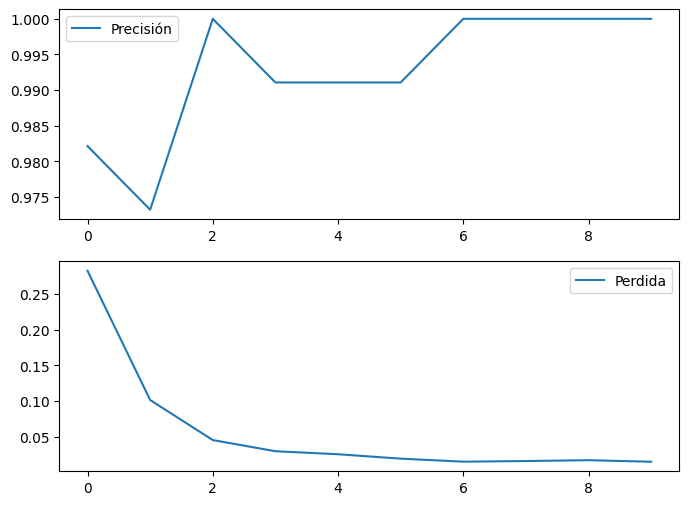

In [83]:
from numpy.lib.histograms import histogram_bin_edges
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))
val_acc = histo_modelo1.history['val_categorical_accuracy']
val_loss = histo_modelo1.history['val_loss']
ax1.plot(val_acc, label='Precisión')
ax2.plot(val_loss, label='Perdida')
ax1.legend()
ax2.legend()
plt.show()

En general según aumentan los ciclos se aumenta la precisión (tanto por ciento de aciertos) y disminuyen las perdidas ( diferencia entre lo predicho y la realidad).

7. Obtener la tabla de clasificación erronea de test y las métricas más usuales.
Se muestra la tabla de confusión y las curvas ROC, anteriormente se mostraron datos de precisión y pérdida.

Matriz de confusión

8/8 [==============================] - 0s 2ms/step


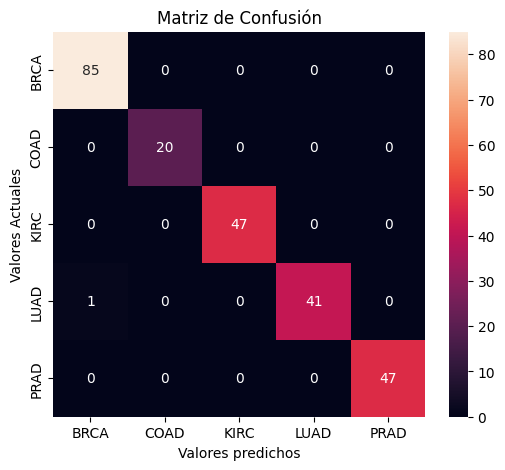

In [84]:
import seaborn as sns
labels_predict=model1.predict(expresion_test)
labels_predict1 = np.argmax(labels_predict, axis=1)
labels_test_uno = np.argmax(np.array(labels_test), axis=1)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(labels_test_uno,labels_predict1)
cm_pd=pd.DataFrame(cm, index=labels.columns,columns=labels.columns)
plt.figure(figsize=(6,5))
sns.heatmap(cm_pd,annot=True)
plt.title('Matriz de Confusión')
plt.ylabel('Valores Actuales')
plt.xlabel('Valores predichos')
plt.show()

Se muestran las curvas ROC para cada tipo de cancer.

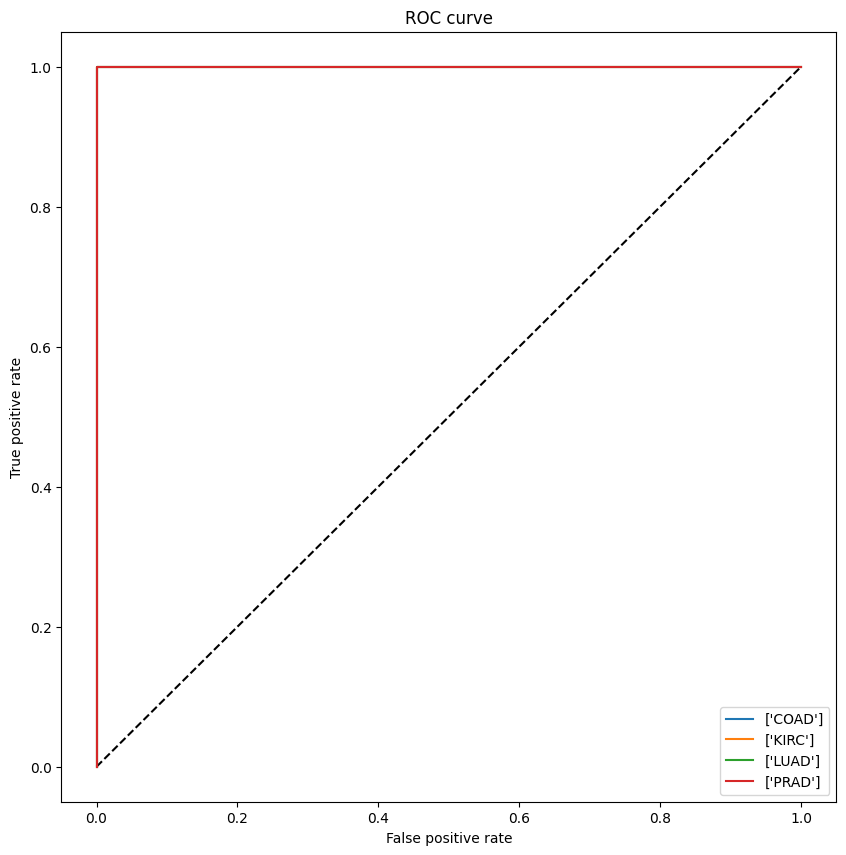

In [85]:
from sklearn.metrics import roc_curve, auc
entrada_roc=np.array(labels_test)
punt_roc=np.array(labels_predict.reshape(241,5))
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(1,5):
  etiqueta=list(labels.columns[i])
  fpr, tpr, threshold = roc_curve(entrada_roc[:,i].ravel(), punt_roc[:,i].ravel())
  plt.plot(fpr, tpr, label = etiqueta) 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

Prácticamente todas las curvas ROC coinciden en máximos.

8. Definir el modelo 2, que consiste en una red neuronal con dos capas ocultas densas de 100 nodos y 10
nodos, con activación relu. Añadir un 30% de dropout en ambas capas. Proporcionar el summary del
modelo y justificar el total de parámetros de cada capa.

Definimos modelo 2 , lo entrenamos y evaluamos mostrando las gráficas igual que en el caso anterior.

In [86]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(100, input_dim=4106, activation='relu'))
model2.add(keras.layers.Dropout(rate = 0.3))
model2.add(keras.layers.Dense(10, input_dim=4106, activation='relu'))
model2.add(keras.layers.Dropout(rate = 0.3))
model2.add(keras.layers.Dense(5, activation='softmax'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               410700    
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
Total params: 411,765
Trainable params: 411,765
Non-trainable params: 0
_________________________________________________________________


En este caso las dos primeras capas son iguales a la anterior, y por lo tanto el número de conexiones de las neuronas también. La capa dense_9 tiene 10X100 conexiones con la capa de Dropout anterior más 10 conexiones con la siguente.
La capa final tiene 10X5 conexiones con la capa dropout_5 más las cinco conexiones de salida.

9. Ajustar el modelo 2 con un 20% de validación, mostrando la curva de aprendizaje de entrenamiento y
validación con 10 epocas.

Epoch 1/10
8/8 [==============================] - 2s 32ms/step - loss: 1.5168 - categorical_accuracy: 0.3371 - val_loss: 1.2405 - val_categorical_accuracy: 0.5714
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 1.2114 - categorical_accuracy: 0.4866 - val_loss: 0.7868 - val_categorical_accuracy: 0.8929
Epoch 3/10
8/8 [==============================] - 0s 10ms/step - loss: 0.8170 - categorical_accuracy: 0.6719 - val_loss: 0.5529 - val_categorical_accuracy: 0.9643
Epoch 4/10
8/8 [==============================] - 0s 10ms/step - loss: 0.6452 - categorical_accuracy: 0.7433 - val_loss: 0.4461 - val_categorical_accuracy: 0.9196
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.5671 - categorical_accuracy: 0.7500 - val_loss: 0.2974 - val_categorical_accuracy: 0.9821
Epoch 6/10
8/8 [==============================] - 0s 11ms/step - loss: 0.5021 - categorical_accuracy: 0.7857 - val_loss: 0.2322 - val_categorical_accuracy: 1.0000
Epoch 7/10
8/8 [========

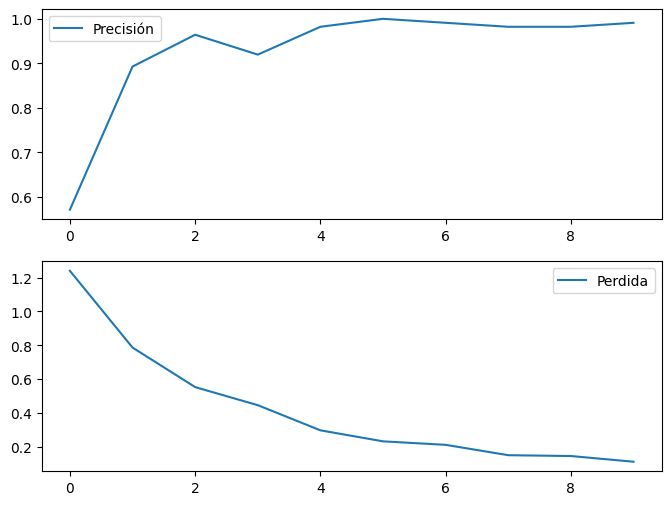

In [88]:
#Compilación
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)
#Entrenamiento
histo_modelo2=model2.fit(
    expresion_train,
    labels_train,
    validation_split=0.20,
    epochs=10,
    batch_size=60)
Puntuacion2 = model2.evaluate(expresion_test, labels_test, verbose=0)
print('Test loss:', Puntuacion2[0])
print('Test accuracy:', Puntuacion2[1])
#Tablas de confusión

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))
val_acc = histo_modelo2.history['val_categorical_accuracy']
val_loss = histo_modelo2.history['val_loss']
ax1.plot(val_acc, label='Precisión')
ax2.plot(val_loss, label='Perdida')
ax1.legend()
ax2.legend()
plt.show()

10. Comparar en test, mediante las métricas de evaluación, los dos modelos.

8/8 [==============================] - 0s 3ms/step


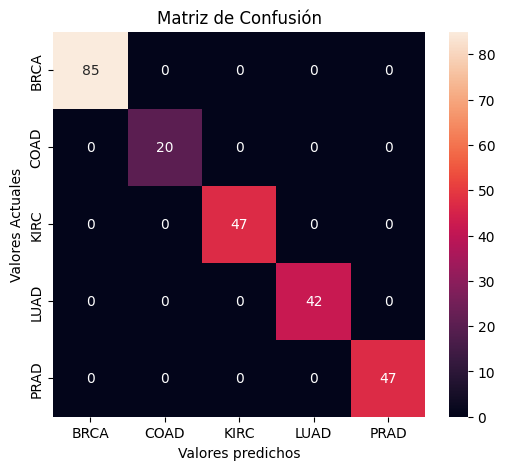

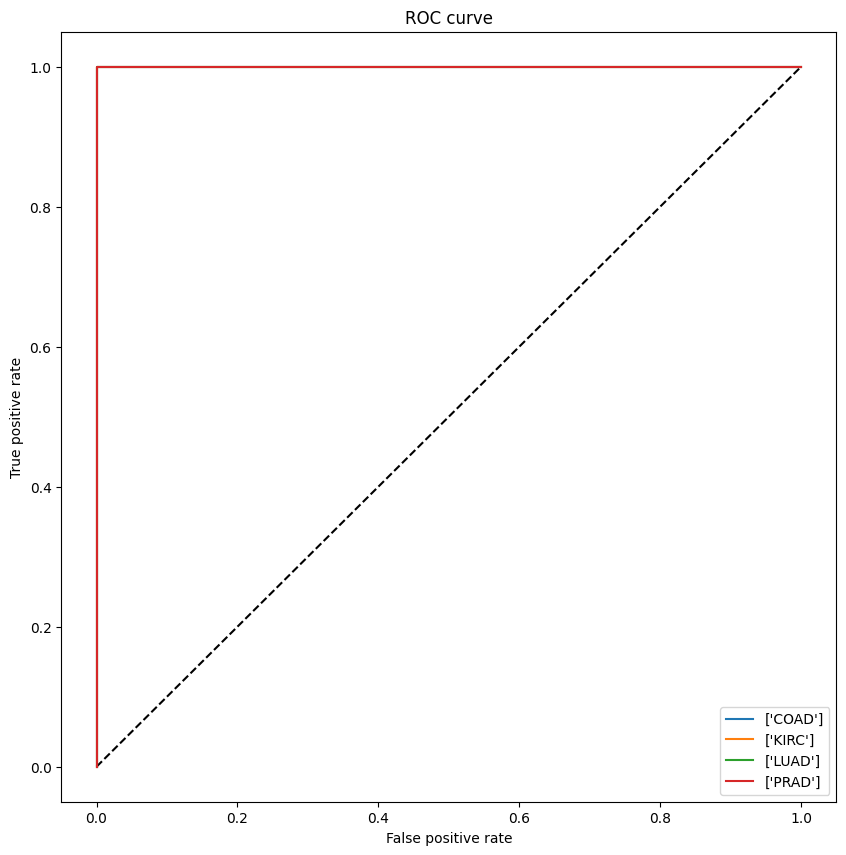

In [89]:
#Matriz de confusión
import seaborn as sns
labels_predicta=model2.predict(expresion_test)
labels_predictb = np.argmax(labels_predicta, axis=1)
labels_test_uno= np.argmax(np.array(labels_test), axis=1)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(labels_test_uno,labels_predictb)
cm_pd=pd.DataFrame(cm, index=labels.columns,columns=labels.columns)
plt.figure(figsize=(6,5))
sns.heatmap(cm_pd,annot=True)
plt.title('Matriz de Confusión')
plt.ylabel('Valores Actuales')
plt.xlabel('Valores predichos')
plt.show()
#Curvas ROC

entrada_roc=np.array(labels_test)
punt_roc=np.array(labels_predicta.reshape(241,5))
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')
for i in range(1,5):
  etiqueta=list(labels.columns[i])
  fpr, tpr, threshold = roc_curve(entrada_roc[:,i].ravel(), punt_roc[:,i].ravel())
  plt.plot(fpr, tpr, label = etiqueta) 
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()

En ambos casos tanto la precisión como la pérdida son envidiables, solo se puede visualizar cierta diferencia en la tabla de confusión, al comparar los valores de precisión para cada uno de los cánceres.
En este caso la desaparición de un falso negativo en el último modelo podría evitar una desgracia.